In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

<AxesSubplot:xlabel='x', ylabel='y'>

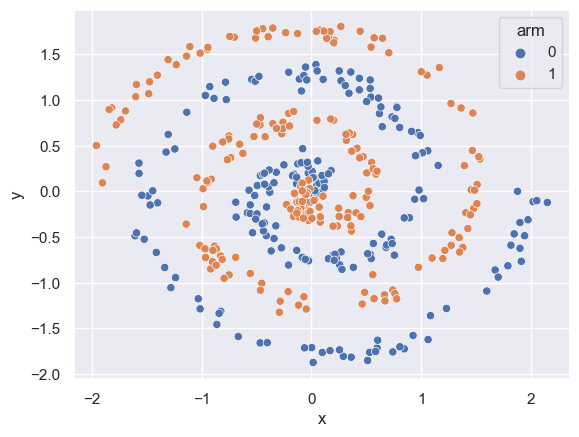

In [2]:
df = pd.read_csv('topic3-spiral.csv')
sns.scatterplot(data=df,x='x',y='y',hue='arm')

In [20]:
NNmodel_adam = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12,activation='relu',input_shape=(2,)),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)])

NNmodel_adam.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
xtrain = np.zeros((df.shape[0],2))
xtrain[:,0] = df['x']
xtrain[:,1] = df['y']
ytrain = df['arm']

In [22]:
NNmodel_adam.fit(xtrain,ytrain,epochs=99,batch_size=10,validation_split=0.2);

Epoch 1/99
32/32 [==============================] - 3s 17ms/step - loss: 0.6757 - accuracy: 0.6250 - val_loss: 0.8827 - val_accuracy: 0.0000e+00
Epoch 2/99
32/32 [==============================] - 0s 7ms/step - loss: 0.6526 - accuracy: 0.6250 - val_loss: 0.9225 - val_accuracy: 0.2000
Epoch 3/99
32/32 [==============================] - 0s 7ms/step - loss: 0.6440 - accuracy: 0.6313 - val_loss: 0.9406 - val_accuracy: 0.1875
Epoch 4/99
32/32 [==============================] - 0s 7ms/step - loss: 0.6351 - accuracy: 0.6313 - val_loss: 0.9251 - val_accuracy: 0.2000
Epoch 5/99
32/32 [==============================] - 0s 12ms/step - loss: 0.6323 - accuracy: 0.6438 - val_loss: 0.9327 - val_accuracy: 0.1750
Epoch 6/99
32/32 [==============================] - 0s 12ms/step - loss: 0.6251 - accuracy: 0.6375 - val_loss: 0.9287 - val_accuracy: 0.2875
Epoch 7/99
32/32 [==============================] - 0s 10ms/step - loss: 0.6185 - accuracy: 0.6406 - val_loss: 0.8313 - val_accuracy: 0.3250
Epoch 8/99
3

Epoch 59/99
32/32 [==============================] - 0s 14ms/step - loss: 0.3897 - accuracy: 0.7844 - val_loss: 0.5416 - val_accuracy: 0.8750
Epoch 60/99
32/32 [==============================] - 0s 13ms/step - loss: 0.3967 - accuracy: 0.7844 - val_loss: 0.4660 - val_accuracy: 0.9125
Epoch 61/99
32/32 [==============================] - 0s 13ms/step - loss: 0.3942 - accuracy: 0.7875 - val_loss: 0.4759 - val_accuracy: 0.9375
Epoch 62/99
32/32 [==============================] - 0s 12ms/step - loss: 0.3898 - accuracy: 0.7844 - val_loss: 0.4792 - val_accuracy: 0.8750
Epoch 63/99
32/32 [==============================] - 0s 6ms/step - loss: 0.4099 - accuracy: 0.7719 - val_loss: 0.5181 - val_accuracy: 0.8750
Epoch 64/99
32/32 [==============================] - 0s 6ms/step - loss: 0.3897 - accuracy: 0.7844 - val_loss: 0.5650 - val_accuracy: 0.8875
Epoch 65/99
32/32 [==============================] - 0s 6ms/step - loss: 0.3818 - accuracy: 0.7750 - val_loss: 0.6535 - val_accuracy: 0.8625
Epoch 66/

82/82 [==============================] - 0s 3ms/step


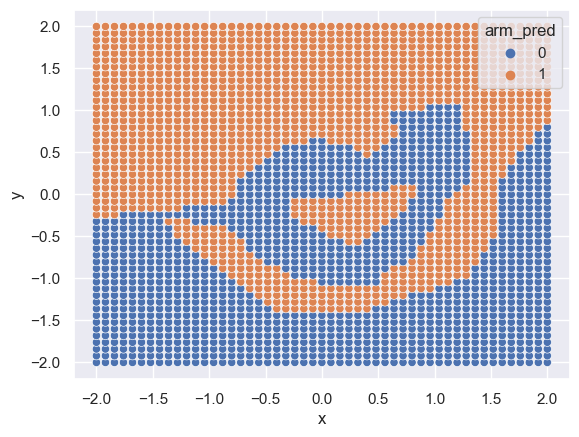

In [23]:
grid = np.linspace(-2,2,num=51)
xg = np.zeros(51**2)
yg = np.zeros(51**2)
k=0
for x in range(51):
    for y in range(51):
        xg[k]=grid[x]
        yg[k]=grid[y]
        k+=1

xy = np.zeros((51**2,2))
xy[:,0]=xg
xy[:,1]=yg

pred = (NNmodel_adam.predict(xy)> 0.5).astype(int)

df_grid = pd.DataFrame({'x':xg,'y':yg,'arm_pred':pred.transpose()[0]})
sns.scatterplot(data=df_grid,x='x',y='y',hue='arm_pred');

In [24]:
dfte = pd.read_csv('xy_locs.csv')
dfte

,x,y
0,-0.382115,0.799741
1,-0.042117,-0.689008
2,0.103946,0.774758
3,-0.797641,0.252785
4,-0.543082,0.000887
5,0.569336,-0.260558
6,-0.323797,0.260914
7,-0.293407,-1.714093
8,1.460393,0.137136
9,0.944145,0.025133


In [ ]:
# scaler = StandardScaler()
# X_test_scaled = scaler.fit_transform(X_test)

In [26]:
for i in NNmodel_adam.predict(dfte):
    if i < 0.5:
        print(0)
    else:
        print(1)

1/1 [==============================] - 0s 65ms/step
1
0
1
1
0
1
0
0
1
0
